<a href="https://colab.research.google.com/github/lj89/Colab/blob/master/QTW_CS6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [16]:
N= int(0.02*10999999) # too challenging for my computer to read in entire data, so subsample about 2% for this assignment

directory = 'C:/Users/N1110/Desktop/QTW/CS6/'
df = pd.read_csv(directory + 'HIGGS.csv', nrows=N,header=None)  # , header=None
df.head() 

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,1.0,0.869293,-0.635082,0.225690,0.327470,-0.689993,0.754202,-0.248573,-1.092064,0.000000,...,-0.010455,-0.045767,3.101961,1.353760,0.979563,0.978076,0.920005,0.721657,0.988751,0.876678
1,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
2,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
3,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
4,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487


In [17]:
df.shape

# 20%
# Out[11]:
# (2199999, 29)

#when read in entire data (10,999,999, 29)

(219999, 29)

In [18]:
cols=['class label','lepton pT', 'lepton eta', 'lepton phi', 'missing energy magnitude'
                  , 'missing energy phi', 'jet 1 pt', 'jet 1 eta', 'jet 1 phi', 'jet 1 b-tag', 'jet 2 pt'
                  , 'jet 2 eta', 'jet 2 phi', 'jet 2 b-tag', 'jet 3 pt', 'jet 3 eta', 'jet 3 phi', 'jet 3 b-tag'
                  , 'jet 4 pt', 'jet 4 eta', 'jet 4 phi', 'jet 4 b-tag', 'm_jj', 'm_jjj', 'm_lv', 'm_jlv'
                  , 'm_bb', 'm_wbb', 'm_wwbb']

df.columns=cols

In [19]:
df.dtypes

class label                 float64
lepton pT                   float64
lepton eta                  float64
lepton phi                  float64
missing energy magnitude    float64
missing energy phi          float64
jet 1 pt                    float64
jet 1 eta                   float64
jet 1 phi                   float64
jet 1 b-tag                 float64
jet 2 pt                    float64
jet 2 eta                   float64
jet 2 phi                   float64
jet 2 b-tag                 float64
jet 3 pt                    float64
jet 3 eta                   float64
jet 3 phi                   float64
jet 3 b-tag                 float64
jet 4 pt                    float64
jet 4 eta                   float64
jet 4 phi                   float64
jet 4 b-tag                 float64
m_jj                        float64
m_jjj                       float64
m_lv                        float64
m_jlv                       float64
m_bb                        float64
m_wbb                       

In [20]:
df.isnull().sum()

class label                 0
lepton pT                   0
lepton eta                  0
lepton phi                  0
missing energy magnitude    0
missing energy phi          0
jet 1 pt                    0
jet 1 eta                   0
jet 1 phi                   0
jet 1 b-tag                 0
jet 2 pt                    0
jet 2 eta                   0
jet 2 phi                   0
jet 2 b-tag                 0
jet 3 pt                    0
jet 3 eta                   0
jet 3 phi                   0
jet 3 b-tag                 0
jet 4 pt                    0
jet 4 eta                   0
jet 4 phi                   0
jet 4 b-tag                 0
m_jj                        0
m_jjj                       0
m_lv                        0
m_jlv                       0
m_bb                        0
m_wbb                       0
m_wwbb                      0
dtype: int64

In [22]:
#save to csv for future use
df.to_csv("./HIGGS2.csv", sep=',',index=False)

In [2]:
# !!!!!!!!!!!!!!!!!!!!!!!!!!! took extremely long time to import the complete data. avoid run the code above on personal computer. run from here.
# acutally still take long to import 2% of the data

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline
from sklearn.model_selection import train_test_split
from time import time

In [17]:

import tensorflow as tf;print("tensorflow:",tf.__version__)
from tensorflow.keras import layers

tensorflow: 2.0.0-alpha0


In [3]:
directory = 'C:/Users/N1110/Desktop/QTW/CS6/'
df_HIGGS= pd.read_csv(directory + 'HIGGS2.csv')  # , header=None
df_HIGGS.head() 

,class label,lepton pT,lepton eta,lepton phi,missing energy magnitude,missing energy phi,jet 1 pt,jet 1 eta,jet 1 phi,jet 1 b-tag,...,jet 4 eta,jet 4 phi,jet 4 b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,1.0,0.869293,-0.635082,0.225690,0.327470,-0.689993,0.754202,-0.248573,-1.092064,0.000000,...,-0.010455,-0.045767,3.101961,1.353760,0.979563,0.978076,0.920005,0.721657,0.988751,0.876678
1,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
2,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
3,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
4,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487


In [4]:
df_HIGGS.shape

(219999, 29)

In [5]:
df_HIGGS['class label'].value_counts() #about the same distribution as original data. good

1.0    116163
0.0    103836
Name: class label, dtype: int64

In [7]:

df_HIGGS.isna().sum()

class label                 0
lepton pT                   0
lepton eta                  0
lepton phi                  0
missing energy magnitude    0
missing energy phi          0
jet 1 pt                    0
jet 1 eta                   0
jet 1 phi                   0
jet 1 b-tag                 0
jet 2 pt                    0
jet 2 eta                   0
jet 2 phi                   0
jet 2 b-tag                 0
jet 3 pt                    0
jet 3 eta                   0
jet 3 phi                   0
jet 3 b-tag                 0
jet 4 pt                    0
jet 4 eta                   0
jet 4 phi                   0
jet 4 b-tag                 0
m_jj                        0
m_jjj                       0
m_lv                        0
m_jlv                       0
m_bb                        0
m_wbb                       0
m_wwbb                      0
dtype: int64

In [6]:
features=['lepton pT', 'lepton eta', 'lepton phi', 'missing energy magnitude'
                  , 'missing energy phi', 'jet 1 pt', 'jet 1 eta', 'jet 1 phi', 'jet 1 b-tag', 'jet 2 pt'
                  , 'jet 2 eta', 'jet 2 phi', 'jet 2 b-tag', 'jet 3 pt', 'jet 3 eta', 'jet 3 phi', 'jet 3 b-tag'
                  , 'jet 4 pt', 'jet 4 eta', 'jet 4 phi', 'jet 4 b-tag', 'm_jj', 'm_jjj', 'm_lv', 'm_jlv'
                  , 'm_bb', 'm_wbb', 'm_wwbb']

In [8]:
y= np.array(df_HIGGS['class label'])

X =np.array(df_HIGGS[features])

In [9]:
#it's good practice to Scale Data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler.fit_transform(X)
scaled_train_df = pd.DataFrame(scaled_train, columns=features)

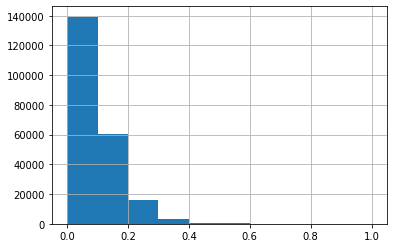

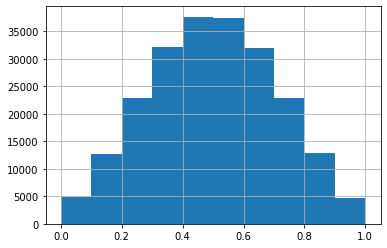

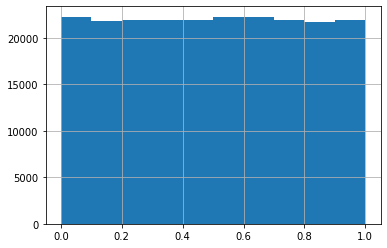

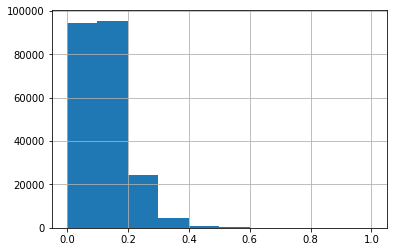

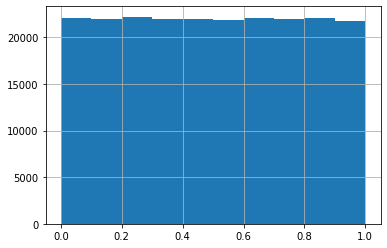

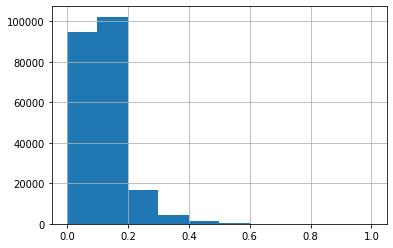

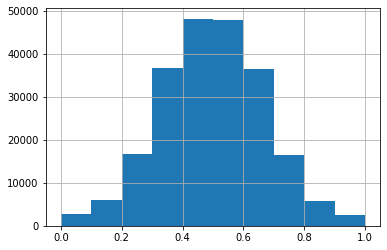

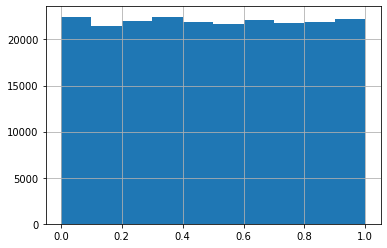

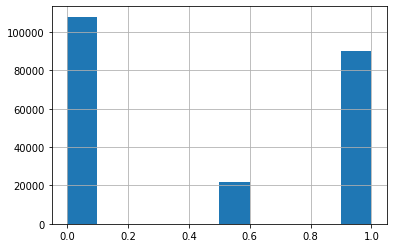

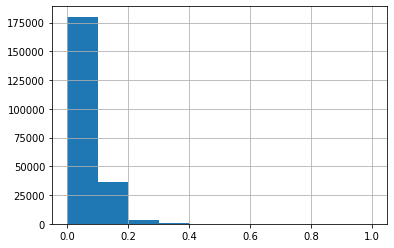

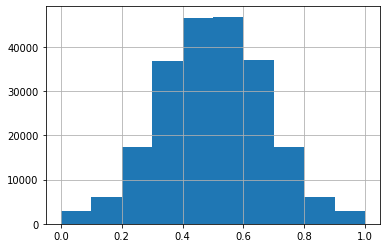

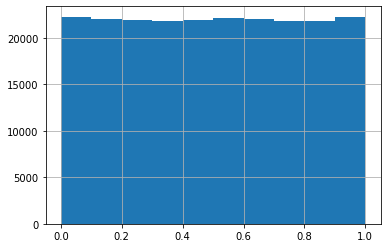

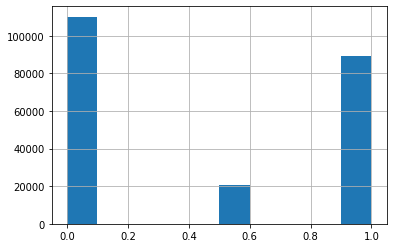

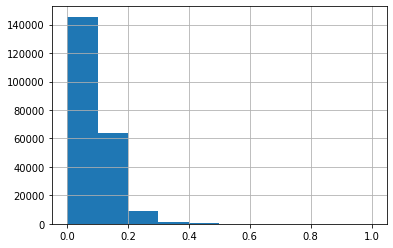

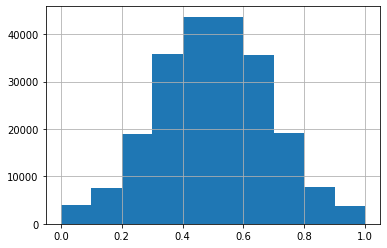

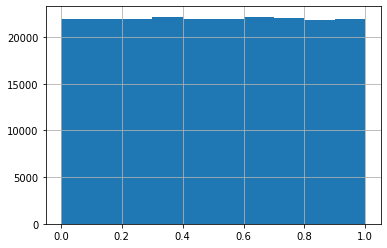

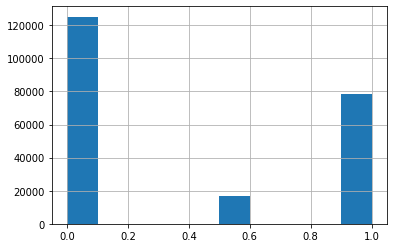

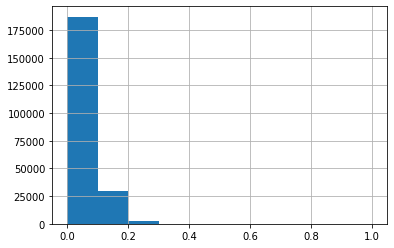

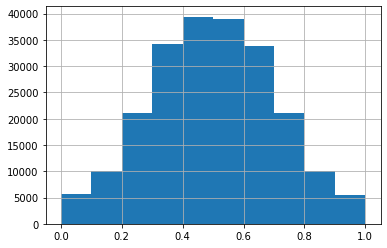

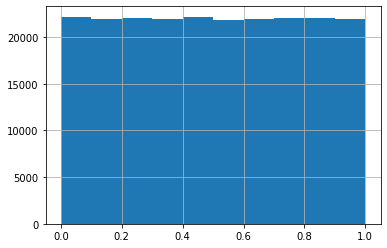

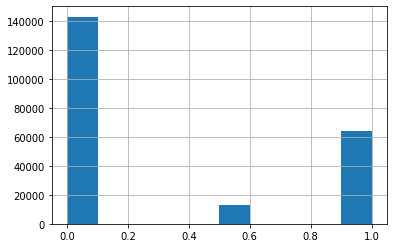

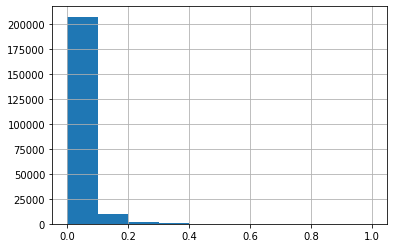

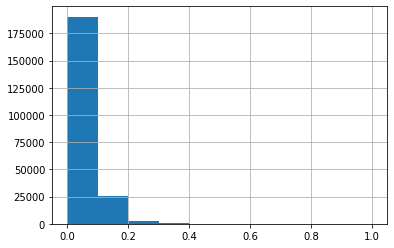

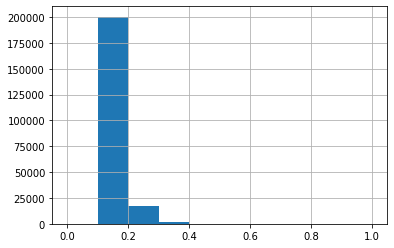

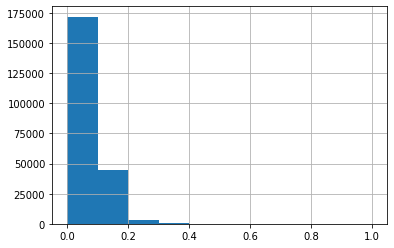

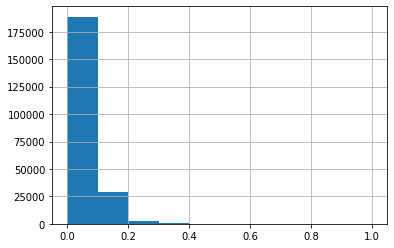

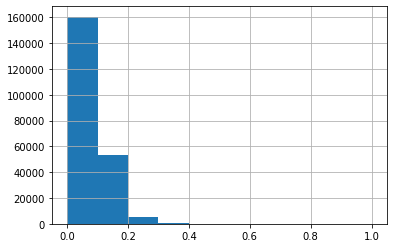

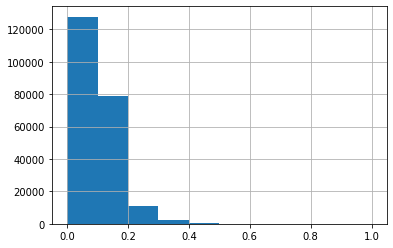

In [12]:

for i in scaled_train_df:
    scaled_train_df[i].hist()
    plt.show()

In [15]:
# cross validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1776)

In [16]:

print(len(y_test))
print(len(y_train))

44000
175999


In [26]:
# want to test activation = ['relu', 'sigmoid', 'tanh', 'elu', 'selu'], dropout [0.1,0.2, 0.3, 0.5]


In [27]:
def tensorflow_keras_model(X_train,y_train,X_test,y_test,Num_layers=1, units=300, activation_func='tanh',learning_rate=0.01
                           ,metrics=['mean_squared_error'],batch_size=1000,epochs=5
                          ,weight_decay=0):
    model= tf.keras.Sequential()
    for i in range(Num_layers):
        model.add(layers.Dense(units, activation=activation_func,kernel_regularizer=tf.keras.regularizers.l2(weight_decay)))
        
    model.add(layers.Dense(3 ,activation=activation_func))

    #compile the model
    model.compile(optimizer=tf.train.GradientDescentOptimizer(learning_rate),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  metrics=metrics)
    # fit the model
    results = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=epochs, batch_size=batch_size, callbacks=[tb])
    
    #add AUC curve
    # credit: https://www.dlology.com/blog/simple-guide-on-how-to-generate-roc-plot-for-keras-classifier/
    
    y_pred_keras = model.predict(X_test)[:, 1]
    print(model.summary())
    #print(y_pred_keras.shape)
    
    if (Num_layers==1):
        figure_Name = "NN_"+str(units)+"_Unites_"+str(learning_rate)+"_learningRate_"+str(weight_decay)+"_weightDecay"
    else:
        figure_Name = "DN_"+str(Num_layers)+"_layer"+str(units)+"_Unites_"+str(learning_rate)+"_learningRate_"+str(weight_decay)+"_weightDecay"
    
    fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
    auc_keras = auc(fpr_keras, tpr_keras)
    
    plt.plot(results.history['loss'], label='train')
    plt.plot(results.history['val_loss'], label='test')
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend()
    plt.savefig(figure_Name+"_loss.png")
    plt.show()
    
    
#     Draw ROC 
    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
#     plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.savefig(figure_Name+"_ROC.png")
    plt.show()

In [29]:

%%time
layer_list = [2,3,4,5,6]
units_list = [100, 200, 300, 500]
init_learning_rate_list= [0.01,0.05]
weight_decay_list=[0,0.00001]

auc_deep = pd.DataFrame(columns=["layer","auc"])
i = 0

for layer in layer_list:
    for units in units_list:
        for learning_rate in init_learning_rate_list:
            for weight_decay in weight_decay_list:
                print("DN-",layer," layers")
                auc_score= tensorflow_keras_model(X_train,y_train,X_test,y_test,Num_layers=layer, units=units,learning_rate=learning_rate,weight_decay=weight_decay)
                auc_deep.loc[i]=[layer,auc_score]
                i+=1

DN- 2  layers


AttributeError: module 'tensorflow._api.v2.train' has no attribute 'GradientDescentOptimizer'